# Task 3 - Training a Variational Autoencoder on MNIST

In [1]:
from VAE import *

from tensorflow import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt # for plotting model loss


%load_ext autoreload
%autoreload 2

Let's load the MNIST dataset:

In [2]:
# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


Normalize the input data (dividing by 255):

In [3]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

Display images of the first 10 digits in the training set and their true lables

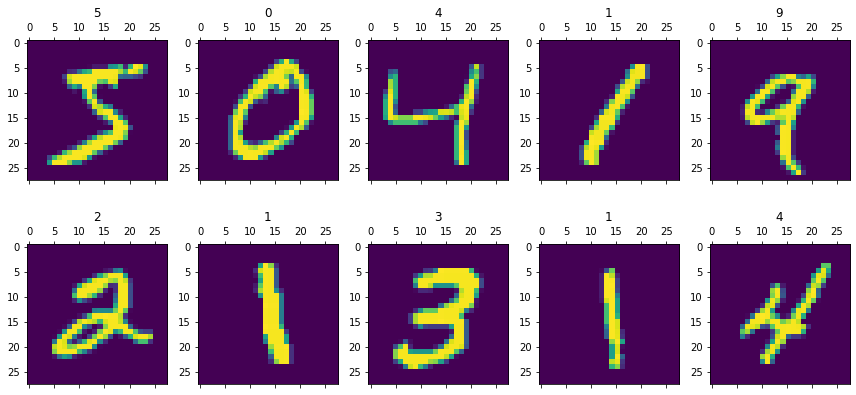

In [4]:
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6), facecolor='white')
n=0
for i in range(0,2):
    for j in range(0,5):
        axs[i,j].matshow(X_train[n])
        axs[i,j].set(title=y_train[n])
        n=n+1
plt.show()

We are working with a NN without convolutional layers so we need to flat the images:

In [5]:
# Reshape input data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


## 2-dimensional latent space

First, we are going to work with a 2-dimensional latent space. Let's obtain the encoder and the decoder of the VAE model:

In [6]:
original_dim = 784 # number of neurons at the input layer (28 * 28 = 784)
latent_dim = 2 # latent space dimension

In [7]:
encoder, visible = create_encoder(original_dim=original_dim, latent_dim=latent_dim)
decoder = create_decoder(latent_dim=latent_dim, original_dim=original_dim)

Let's plot the schema of the encoder and the decoder:

In [8]:
plot_model(encoder, show_shapes=True, dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [9]:
plot_model(decoder, show_shapes=True, dpi=300)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Let's create the VAE model:

In [10]:
(vae, encoder, decoder) = create_vae(encoder, decoder, visible, original_dim)

Let's train the VAE model:

In [11]:
epochs = 100
batch_size = 128

Epoch 1/100
469/469 [==============================] - 29s 53ms/step - loss: 47.7872 - val_loss: 43.1260
Epoch 2/100
469/469 [==============================] - 21s 46ms/step - loss: 41.9483 - val_loss: 40.6160
Epoch 3/100
469/469 [==============================] - 18s 38ms/step - loss: 40.0033 - val_loss: 39.2578
Epoch 4/100
469/469 [==============================] - 19s 41ms/step - loss: 38.6996 - val_loss: 38.1835
Epoch 5/100
469/469 [==============================] - 28s 60ms/step - loss: 37.8368 - val_loss: 37.7638
Epoch 6/100
469/469 [==============================] - 29s 62ms/step - loss: 37.1517 - val_loss: 36.8417
Epoch 7/100
469/469 [==============================] - 23s 49ms/step - loss: 36.5457 - val_loss: 36.4717
Epoch 8/100
469/469 [==============================] - 27s 57ms/step - loss: 36.1816 - val_loss: 36.2916
Epoch 9/100
469/469 [==============================] - 27s 57ms/step - loss: 35.8454 - val_loss: 35.6864
Epoch 10/100
469/469 [==============================] -

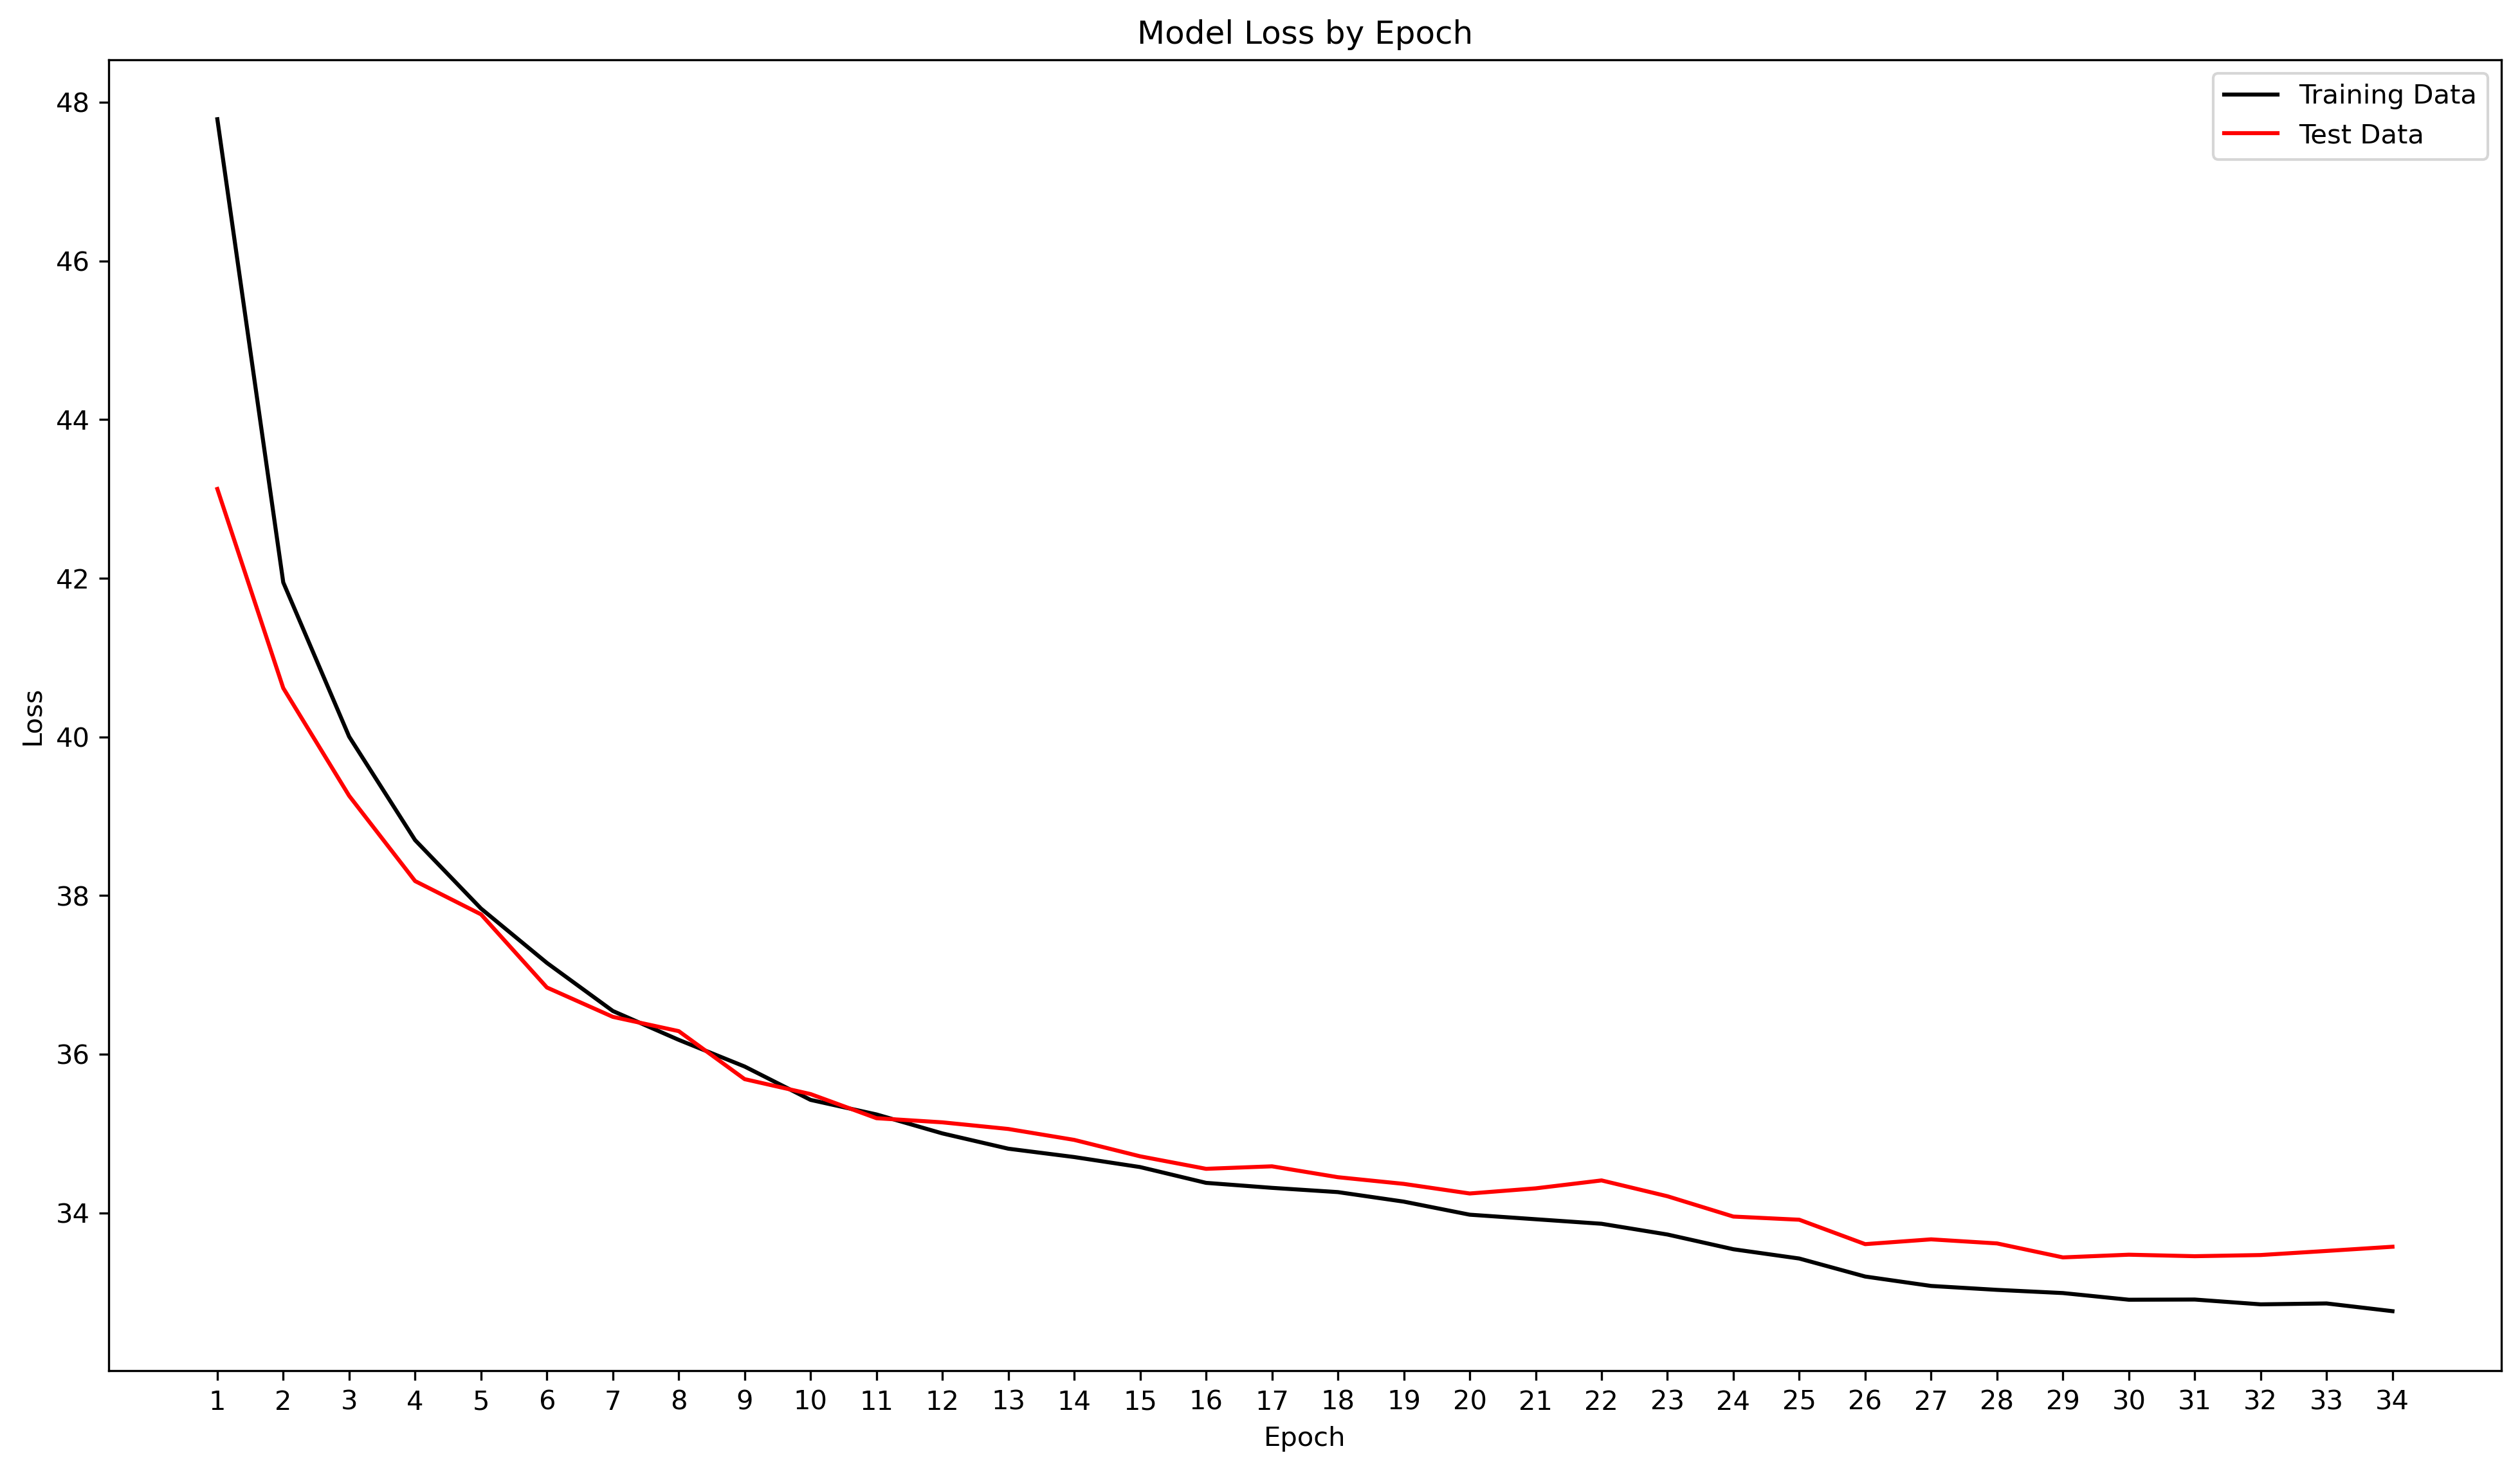

In [12]:
convergence = EarlyStopping(patience = 5)
(vae, encoder, decoder) = train_and_plot_vae(vae, 
                                             encoder, 
                                             decoder, 
                                             X_train, 
                                             X_test, 
                                             epochs=epochs, 
                                             batch_size=batch_size,
                                             callbacks=[convergence])

Let's visualize the latent space:

In [16]:
visualize_latent_space(encoder, X_test, y_test)

313/313 [==============================] - 2s 6ms/step


Let's reconstruct 15 digits:

313/313 [==============================] - 2s 5ms/step


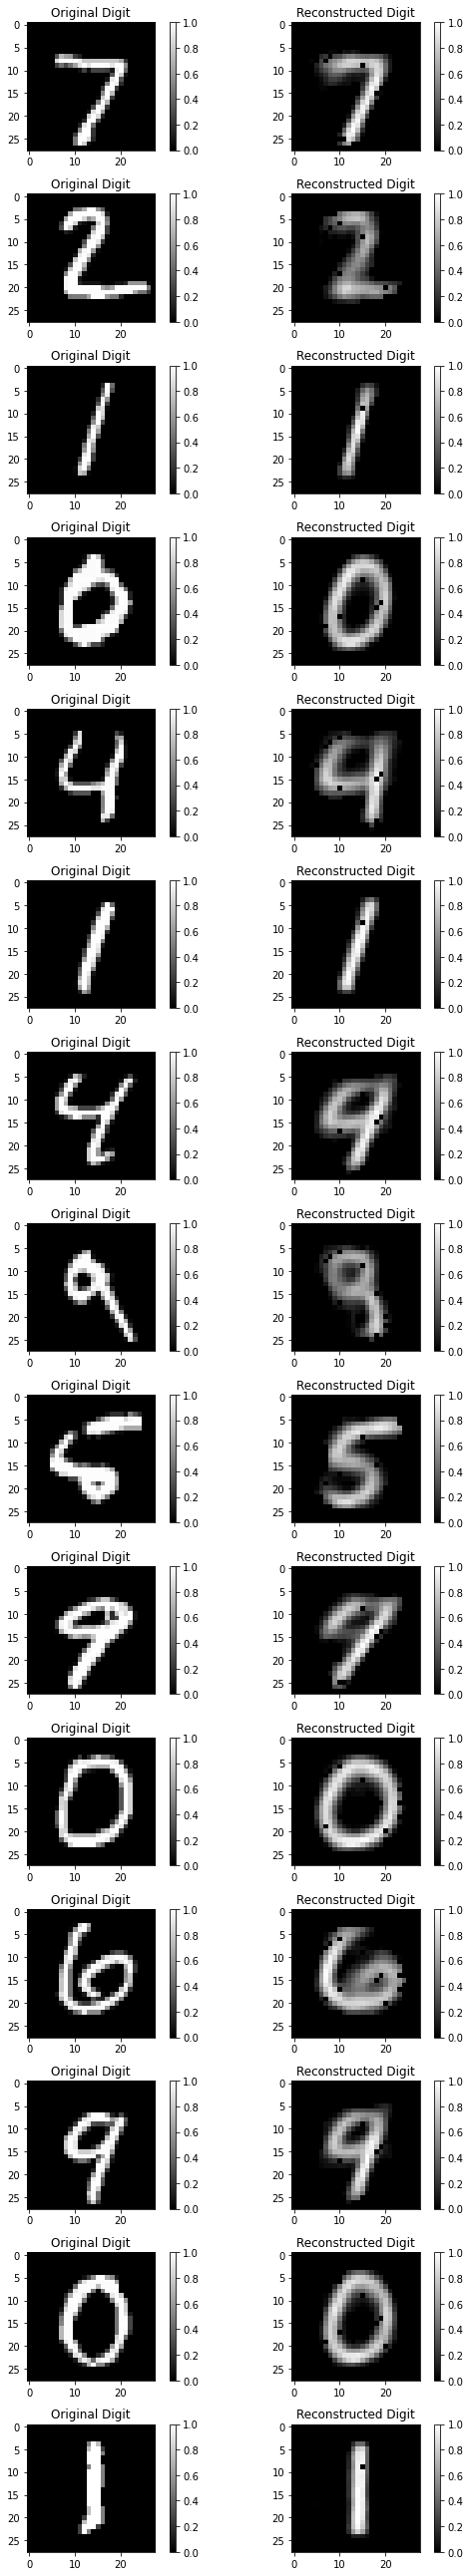

In [17]:
reconstruct_digits(X_test=X_test, encoder=encoder, decoder=decoder)

Let's generate new digits:

1/1 [==============================] - 0s 31ms/step


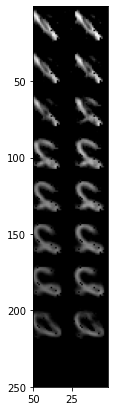

In [18]:
generate_digits(decoder)

## 32-dimensional latent space

Now let's work with a VAE mdel with 32-dimensional latent space.

In [19]:
latent_dim = 32 # latent space dimension

In [20]:
encoder, visible = create_encoder(original_dim=original_dim, latent_dim=latent_dim)
decoder = create_decoder(latent_dim=latent_dim, original_dim=original_dim)

In [21]:
(vae_32, encoder_32, decoder_32) = create_vae(encoder, decoder, visible, original_dim)

Let's train the model:

In [22]:
epochs = 100

Epoch 1/100
469/469 [==============================] - 25s 48ms/step - loss: 42.2725 - val_loss: 32.2378
Epoch 2/100
469/469 [==============================] - 30s 64ms/step - loss: 30.0147 - val_loss: 28.2068
Epoch 3/100
469/469 [==============================] - 35s 75ms/step - loss: 27.5308 - val_loss: 26.5478
Epoch 4/100
469/469 [==============================] - 25s 53ms/step - loss: 26.3097 - val_loss: 25.6574
Epoch 5/100
469/469 [==============================] - 26s 56ms/step - loss: 25.6361 - val_loss: 25.1654
Epoch 6/100
469/469 [==============================] - 28s 59ms/step - loss: 25.1825 - val_loss: 24.8573
Epoch 7/100
469/469 [==============================] - 29s 63ms/step - loss: 24.8435 - val_loss: 24.4171
Epoch 8/100
469/469 [==============================] - 25s 53ms/step - loss: 24.5491 - val_loss: 24.2948
Epoch 9/100
469/469 [==============================] - 23s 49ms/step - loss: 24.3222 - val_loss: 24.1949
Epoch 10/100
469/469 [==============================] -

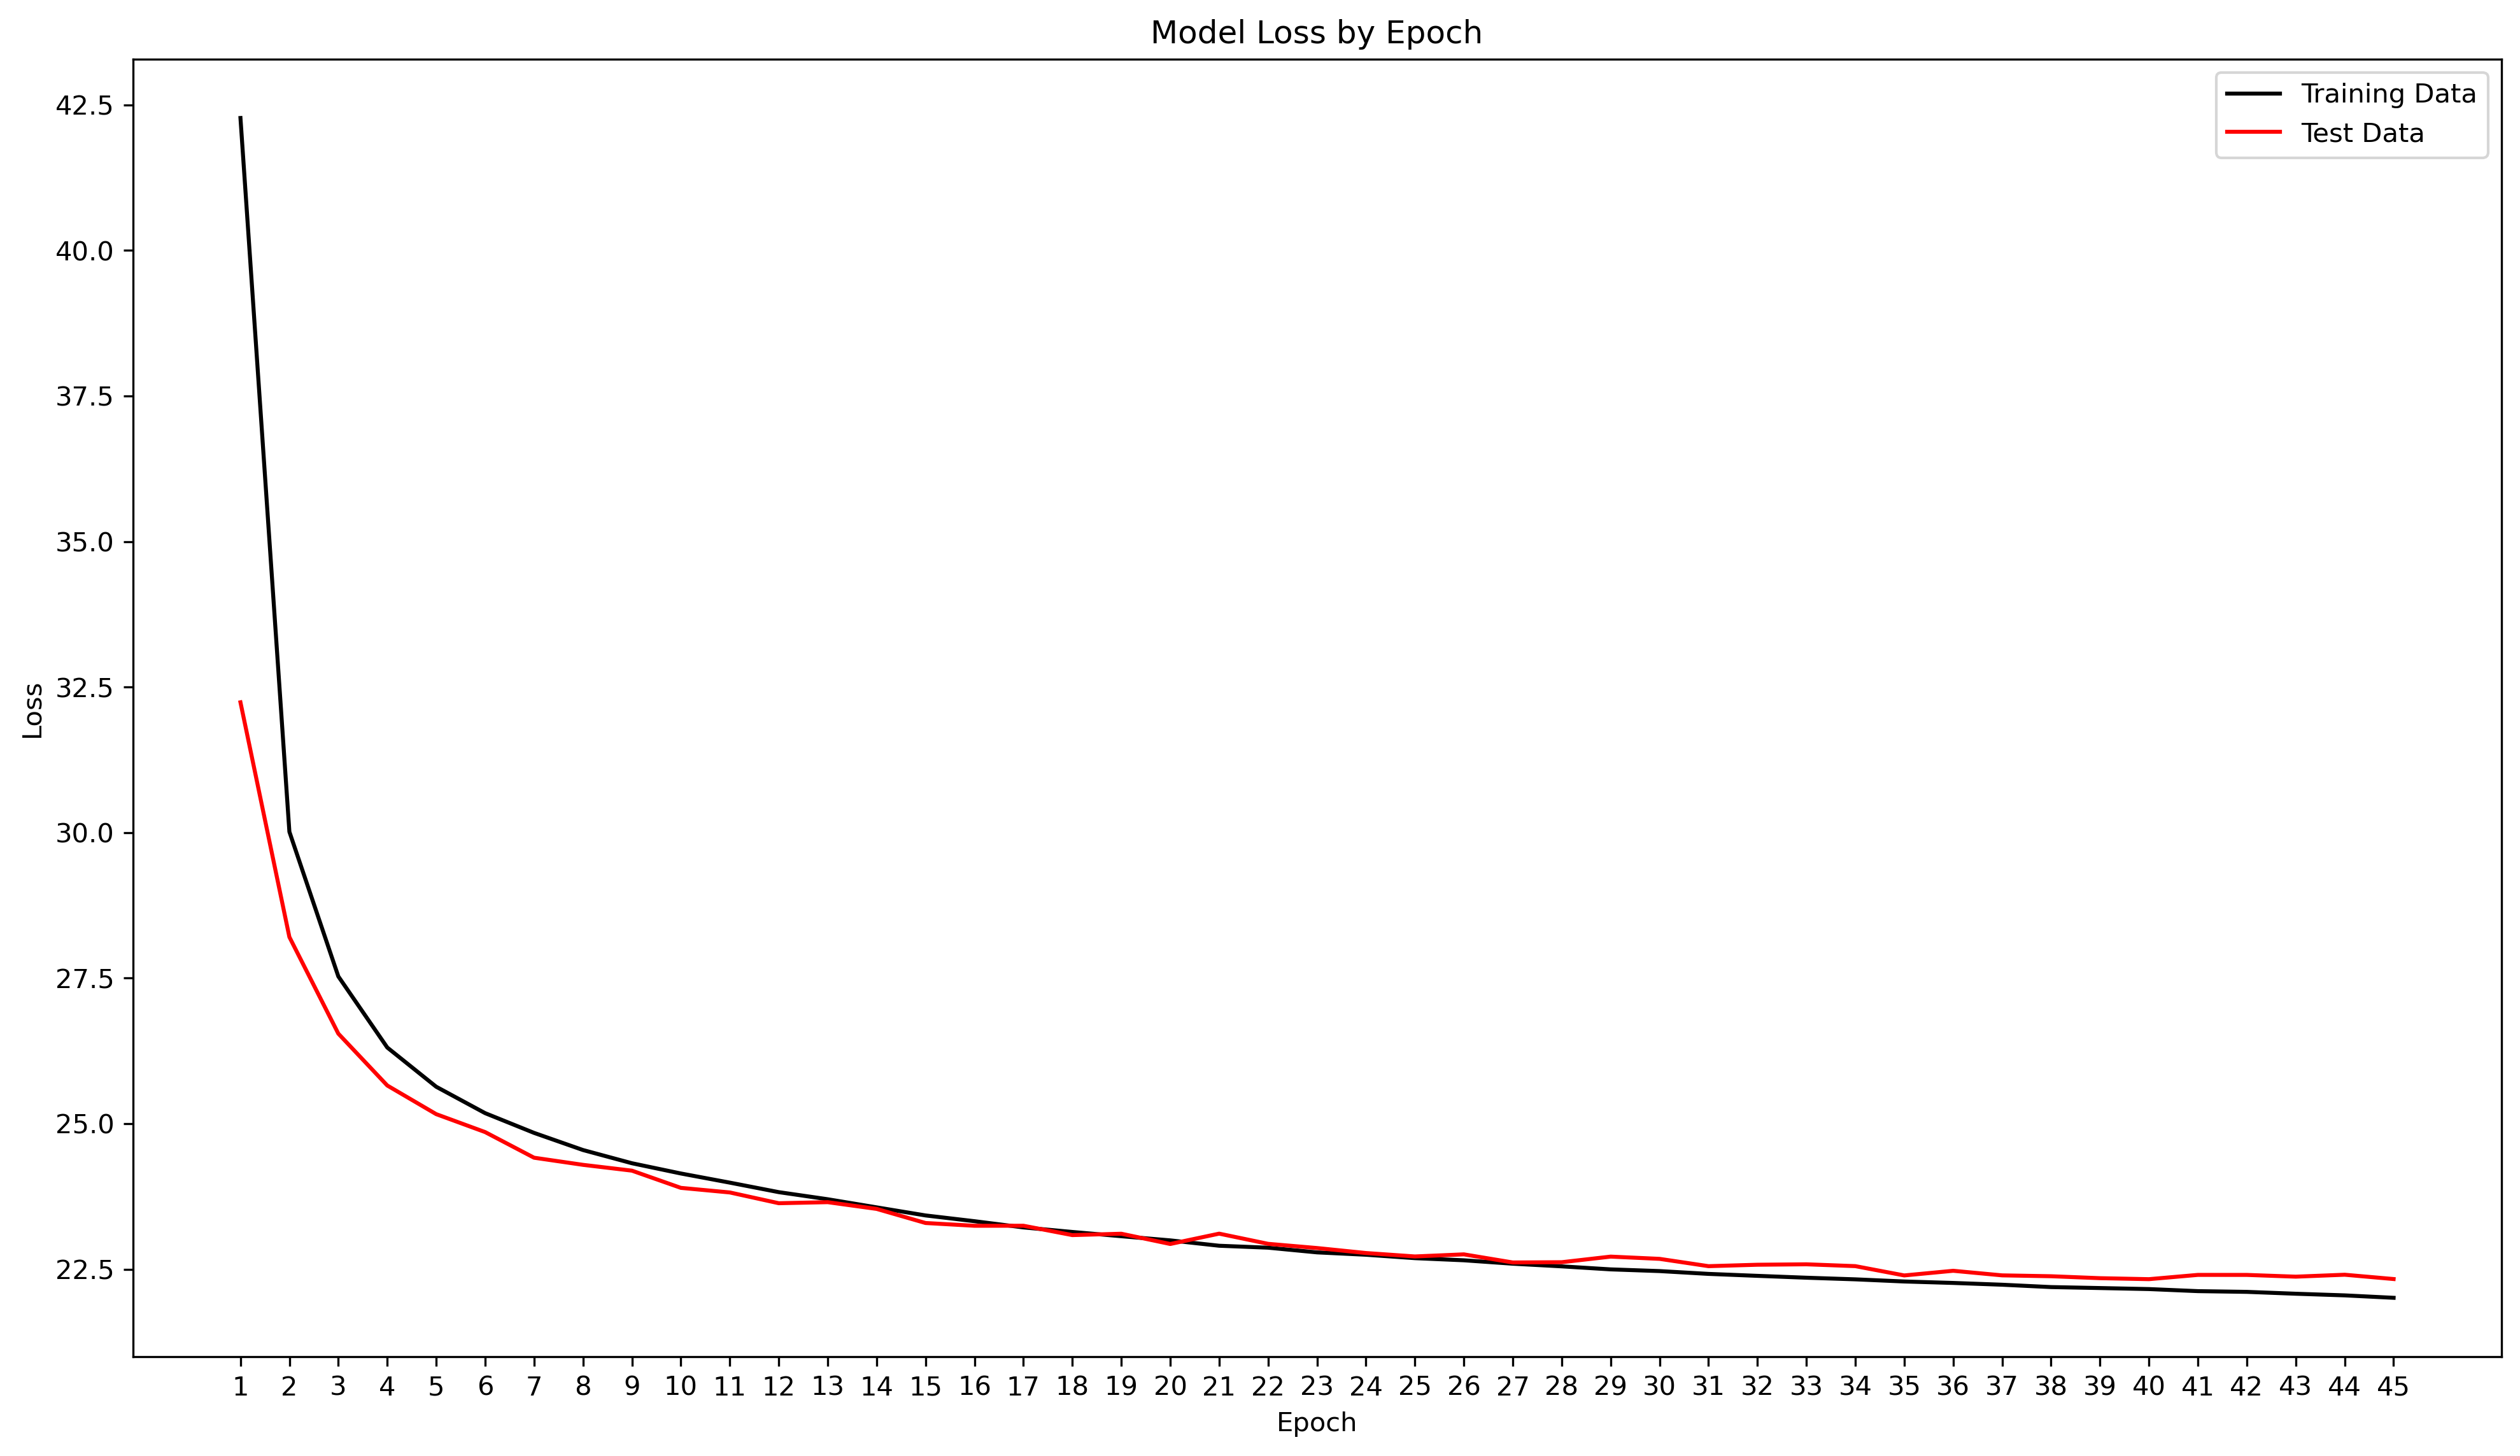

In [23]:
convergence = EarlyStopping(patience = 5)
(vae_32, encoder_32, decoder_32) = train_and_plot_vae(vae_32,
                                                      encoder_32,
                                                      decoder_32,
                                                      X_train,
                                                      X_test,
                                                      epochs=epochs,
                                                      batch_size=batch_size,
                                                      callbacks=[convergence])

Let's generate new digits:

In [35]:
#generate_digits(decoder_32)

1/1 [==============================] - 0s 34ms/step


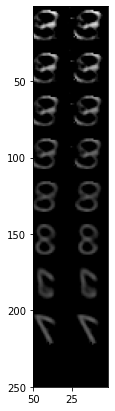

In [74]:
image_size = 28
values = np.arange(-3, 4, .5)
xx, yy = np.meshgrid(values, values)
input_holder = np.zeros((1, 2))
container = np.zeros((image_size * len(values), image_size * len(values)))

for row in range(8):
    for col in range(2):
        input_holder = np.array([[yy[row, col]]*32])
        output = decoder.predict(input_holder)
        artificial_image = output.reshape((image_size,image_size))
        container[row * image_size: (row + 1) * image_size, col * image_size: (col + 1) * image_size] = np.squeeze(artificial_image)
        
plt.figure(figsize=(50,7))
plt.xlim(50)
plt.ylim(250)
plt.imshow(container, cmap='gray')